# Loading and Preprocessing

In [282]:
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score, mean_absolute_percentage_error, mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
import pandas as pd


df_raw = pd.read_csv('data/Concrete_Data.csv')
df_raw.columns


Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [283]:
df = df_raw.rename(columns={'Cement (component 1)(kg in a m^3 mixture)': 'Cement (kg/m³)',
                            'Blast Furnace Slag (component 2)(kg in a m^3 mixture)': 'Blast Furnace Slag (kg/m³)',
                            'Fly Ash (component 3)(kg in a m^3 mixture)': 'Fly Ash (kg/m³)',
                            'Water  (component 4)(kg in a m^3 mixture)': 'Water (kg/m³)',
                            'Superplasticizer (component 5)(kg in a m^3 mixture)': 'Superplasticizer (kg/m³)',
                            'Coarse Aggregate  (component 6)(kg in a m^3 mixture)': 'Coarse Aggregate (kg/m³)',
                            'Fine Aggregate (component 7)(kg in a m^3 mixture)': 'Fine Aggregate (kg/m³)',
                            'Concrete compressive strength(MPa, megapascals) ': 'Compressive Strength (MPa)'})

# Methodology

## PCA

In [284]:
# In the descriptive analysis phase we found that some independent variable exhibit multi-colliniearity.

# Standardize the data
data_standardized = (df - df.mean()) / df.std()

# Compute the covariance matrix
covariance_matrix = data_standardized.cov()

# Compute the eigenvectors and eigenvalues of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Choose the number of principal components to retain
n_components = 2

# Transform the data
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(data_standardized)
print(pca.components_)

[[ 0.04132675  0.16304274 -0.36989956  0.56402186 -0.53601839  0.06027386
  -0.38176315  0.26194127 -0.10704127]
 [ 0.53648595  0.1361477  -0.26827048 -0.11845773  0.24824875 -0.22476104
  -0.18686019  0.25176813  0.63023524]]


In [285]:
# Select all independent variables.
X = df.iloc[:, :-1]
# Select only the target variable.
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size= 0.2,
                                                    shuffle= True, # Shuffle the data to avoid bias
                                                    random_state= 50)

## Models

### Multiple Linear Regression

In [286]:
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

LinearRegression()

In [287]:
mlr_y_predicted =  mlr_model.predict(X_test)

# Mean Absolute Error
mlr_metric_mae = mean_absolute_error(y_test, mlr_y_predicted)
print(f'Mean Absolute Error {mlr_metric_mae}')

# Mean Absolute Percentage Error
mlr_metric_mape = mean_absolute_percentage_error(y_test, mlr_y_predicted)
print(f'Mean Absolute Percentage Error {mlr_metric_mape}')

# Mean Squared Error
mlr_metric_mse = mean_squared_error(y_test, mlr_y_predicted)
print(f'Mean Squared Error {mlr_metric_mse}')

# Mean Squared Log Error
mlr_metric_msle = mean_squared_log_error(y_test, mlr_y_predicted)
print(f'Mean Squared Log Error {mlr_metric_msle}')

# Root Mean Squared Error
mlr_metric_rmse = np.sqrt(mean_squared_error(y_test, mlr_y_predicted))
print(f'Root Mean Squared Error {mlr_metric_rmse}')

# Explained Variance Score
mlr_metric_evs = explained_variance_score(y_test, mlr_y_predicted)
print(f'Explained Variance Score {mlr_metric_evs}')

# R2 score
mlr_metric_r2 = r2_score(y_test, mlr_y_predicted)
print(f'R Squared Score {mlr_metric_r2}')


Mean Absolute Error 7.9100408151230575
Mean Absolute Percentage Error 0.3338653542629698
Mean Squared Error 98.115811061572
Mean Squared Log Error 0.12016603228350434
Root Mean Squared Error 9.905342551450303
Explained Variance Score 0.6360416556439641
R Squared Score 0.6359646484072214


In [288]:
print(mlr_model.intercept_)
print(mlr_model.coef_)

-8.588336120681141
[ 0.11435239  0.09812924  0.07706773 -0.16950172  0.31739452  0.01450578
  0.01343895  0.11158763]


### Decision Tree Regression (Regression Tree)

In [289]:
regression_model = DecisionTreeRegressor(criterion="squared_error", min_samples_leaf=3, max_depth=10)
regression_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=3)

In [290]:
dtr_y_predicted = regression_model.predict(X_test)

# Mean Absolute Error
dtr_metric_mae = mean_absolute_error(y_test, dtr_y_predicted)
print(f'Mean Absolute Error {dtr_metric_mae}')

# Mean Absolute Percentage Error
dtr_metric_mape = mean_absolute_percentage_error(y_test, dtr_y_predicted)
print(f'Mean Absolute Percentage Error {dtr_metric_mape}')

# Mean Squared Error
dtr_metric_mse = mean_squared_error(y_test, dtr_y_predicted)
print(f'Mean Squared Error {dtr_metric_mse}')

# Mean Squared Log Error
dtr_metric_msle = mean_squared_log_error(y_test, dtr_y_predicted)
print(f'Mean Squared Log Error {dtr_metric_msle}')

# Root Mean Squared Error
dtr_metric_rmse = np.sqrt(mean_squared_error(y_test, dtr_y_predicted))
print(f'Root Mean Squared Error {dtr_metric_rmse}')

# Explained Variance Score
dtr_metric_evs = explained_variance_score(y_test, dtr_y_predicted)
print(f'Explained Variance Score {dtr_metric_evs}')

# R2 score
dtr_metric_r2 = r2_score(y_test, dtr_y_predicted)
print(f'R Squared Score {dtr_metric_r2}')


Mean Absolute Error 5.230615530808312
Mean Absolute Percentage Error 0.19048650132232525
Mean Squared Error 47.617167653296505
Mean Squared Log Error 0.05498945664938678
Root Mean Squared Error 6.900519375619237
Explained Variance Score 0.8241751114500802
R Squared Score 0.8233278389999547


###  K-Nearest Neighbors (KNN)

Optimal hyperparameter k 3


<Figure size 640x480 with 0 Axes>

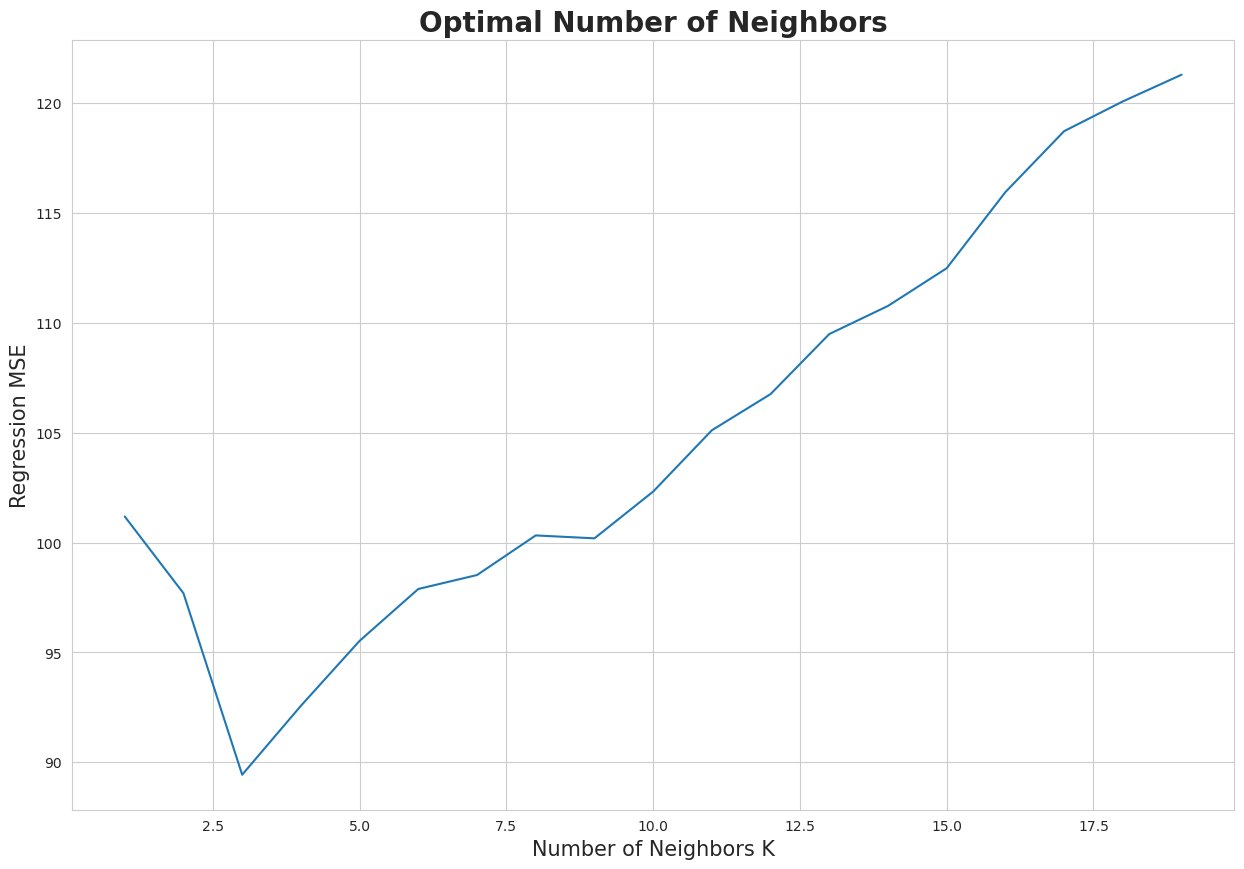

In [291]:
# Creating list of K for KNN
k_list = list(range(1, 20))
# Creating list of cv scores, based on 'neg_mean_squared_error'
knn_mse_cv_scores = []

# perform 5-fold cross validation
for k in k_list:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    knn_mse_cv_scores.append(scores.mean())

knn_cv_mse = [1 - x for x in knn_mse_cv_scores]
print(f'Optimal hyperparameter k {np.argmin(knn_cv_mse) + 1}') # +1 is because array index is 0 based

plt.figure()
plt.figure(figsize=(15,10))
plt.title('Optimal Number of Neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Regression MSE', fontsize=15)
sb.set_style("whitegrid")
plt.plot(k_list, knn_cv_mse)

plt.show()


In [292]:
knn = KNeighborsRegressor(n_neighbors=3)

# Fit the model on the training data
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [293]:
knn_y_predicted = knn.predict(X_test)

# Mean Absolute Error
knn_metric_mae = mean_absolute_error(y_test, knn_y_predicted)
print(f'Mean Absolute Error {knn_metric_mae}')

# Mean Absolute Percentage Error
knn_metric_mape = mean_absolute_percentage_error(y_test, knn_y_predicted)
print(f'Mean Absolute Percentage Error {knn_metric_mape}')

# Mean Squared Error
knn_metric_mse = mean_squared_error(y_test, knn_y_predicted)
print(f'Mean Squared Error {knn_metric_mse}')

# Mean Squared Log Error
knn_metric_msle = mean_squared_log_error(y_test, knn_y_predicted)
print(f'Mean Squared Log Error {knn_metric_msle}')

# Root Mean Squared Error
knn_metric_rmse = np.sqrt(mean_squared_error(y_test, knn_y_predicted))
print(f'Root Mean Squared Error {knn_metric_rmse}')

# Explained Variance Score
knn_metric_evs = explained_variance_score(y_test, knn_y_predicted)
print(f'Explained Variance Score {knn_metric_evs}')

# R2 score
knn_metric_r2 = r2_score(y_test, knn_y_predicted)
print(f'R Squared Score {knn_metric_r2}')

Mean Absolute Error 6.781504854368932
Mean Absolute Percentage Error 0.29333246627467285
Mean Squared Error 81.49366370010787
Mean Squared Log Error 0.11228844870844386
Root Mean Squared Error 9.027384100618953
Explained Variance Score 0.7043400833784348
R Squared Score 0.6976371677849624


In [294]:
results = {
    'Metric' : ['Mean Absolute Error', 'Mean Absolute Percentage Error', 'Mean Squared Error', 'Mean Squared Log Error', 'Root Mean Squared Error', 'Explained Variance Score', 'R Squared Score'],
    'MLR': [mlr_metric_mae, mlr_metric_mape, mlr_metric_mse, mlr_metric_msle, mlr_metric_rmse, mlr_metric_evs, mlr_metric_r2],
    'DTR': [dtr_metric_mae, dtr_metric_mape, dtr_metric_mse, dtr_metric_msle, dtr_metric_rmse, dtr_metric_evs, dtr_metric_r2],
    'KNN': [knn_metric_mae, knn_metric_mape, knn_metric_mse, knn_metric_msle, knn_metric_rmse, knn_metric_evs, knn_metric_r2]}

results_df = pd.DataFrame(results)
print(results_df)

                           Metric        MLR        DTR        KNN
0             Mean Absolute Error   7.910041   5.230616   6.781505
1  Mean Absolute Percentage Error   0.333865   0.190487   0.293332
2              Mean Squared Error  98.115811  47.617168  81.493664
3          Mean Squared Log Error   0.120166   0.054989   0.112288
4         Root Mean Squared Error   9.905343   6.900519   9.027384
5        Explained Variance Score   0.636042   0.824175   0.704340
6                 R Squared Score   0.635965   0.823328   0.697637


In [295]:
results_df.head()

,Metric,MLR,DTR,KNN
0,Mean Absolute Error,7.910041,5.230616,6.781505
1,Mean Absolute Percentage Error,0.333865,0.190487,0.293332
2,Mean Squared Error,98.115811,47.617168,81.493664
3,Mean Squared Log Error,0.120166,0.054989,0.112288
4,Root Mean Squared Error,9.905343,6.900519,9.027384


[Text(0, 0, 'Explained Variance Score'), Text(1, 0, 'R Squared Score')]

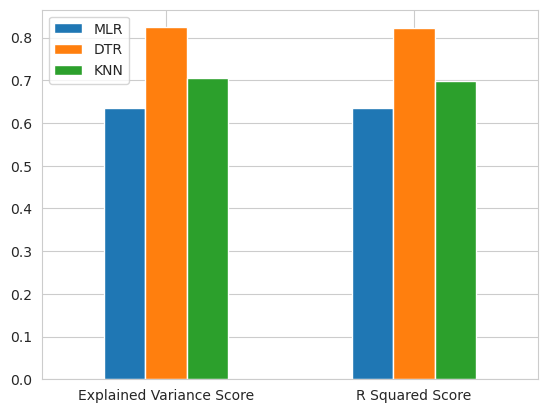

In [296]:
variance_score_values = ['Explained Variance Score', 'R Squared Score']
variance_score_results_df = results_df[results_df['Metric'].isin(variance_score_values)]
variance_score_results_df.plot(kind='bar').set_xticklabels(variance_score_values, rotation=0)

[Text(0, 0, 'Mean Absolute Error'), Text(1, 0, 'Root Mean Squared Error')]

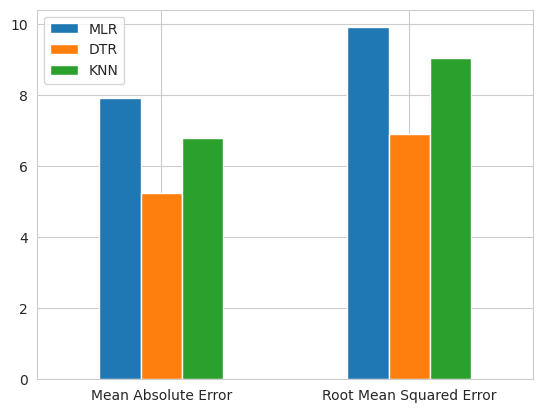

In [297]:
error_score_values = ['Mean Absolute Error', 'Root Mean Squared Error']
error_score_results_df = results_df[results_df['Metric'].isin(error_score_values)]
error_score_results_df.plot(kind='bar').set_xticklabels(error_score_values, rotation=0)

[Text(0, 0, 'Mean Absolute Percentage Error'),
 Text(1, 0, 'Mean Squared Log Error')]

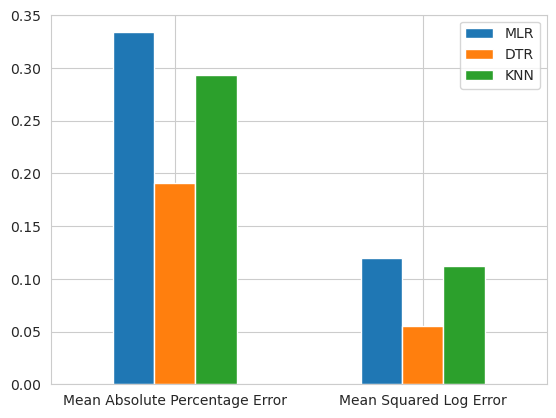

In [298]:
error_score_values = ['Mean Absolute Percentage Error', 'Mean Squared Log Error']
error_score_results_df = results_df[results_df['Metric'].isin(error_score_values)]
error_score_results_df.plot(kind='bar').set_xticklabels(error_score_values, rotation=0)

[Text(0, 0, 'Mean Squared Error')]

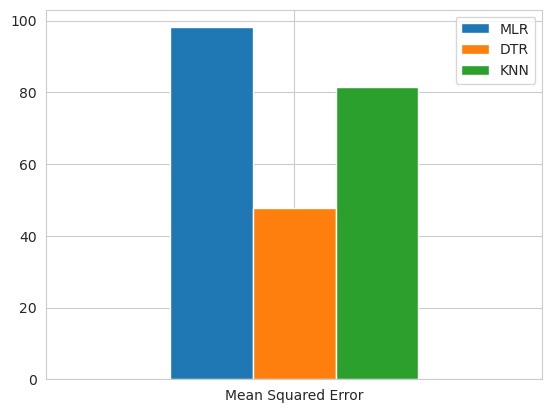

In [299]:
error_score_values = ['Mean Squared Error']
error_score_results_df = results_df[results_df['Metric'].isin(error_score_values)]
error_score_results_df.plot(kind='bar').set_xticklabels(error_score_values, rotation=0)